In [2]:
from fredapi import Fred
import pandas as pd

In [3]:
fred = Fred(api_key="0e929d96cfbf2133c9a346a74670f033")

In [4]:
# get PCE
pce = fred.get_series('PCE')

In [5]:
# get DSPI
dspi = fred.get_series('DSPI')

In [6]:
# convert both series into a df

df = pd.concat([pce, dspi], axis=1)
df.reset_index(inplace=True)
df.columns = ['date','pce', 'dspi']

In [7]:
df

,date,pce,dspi
0,1959-01-01,306.1,351.5
1,1959-02-01,309.6,352.9
2,1959-03-01,312.7,355.2
3,1959-04-01,312.2,358.2
4,1959-05-01,316.1,360.3
...,...,...,...
771,2023-04-01,18363.8,20106.6
772,2023-05-01,18407.8,20198.8
773,2023-06-01,18485.4,20224.8
774,2023-07-01,18643.3,20223.2


In [14]:
df.set_index("date", inplace=True)
df

,pce,dspi
date,,
1959-01-01,306.1,351.5
1959-02-01,309.6,352.9
1959-03-01,312.7,355.2
1959-04-01,312.2,358.2
1959-05-01,316.1,360.3
...,...,...
2023-04-01,18363.8,20106.6
2023-05-01,18407.8,20198.8
2023-06-01,18485.4,20224.8


- As disposable personal income changes, consumer expenditure changes. There's a sharp increase in dspi and sharp decrease in pce. Why? More savings (with Covid with stimulus checks?) occured as basic economy states `savings = income - expenses`. After that, we have pce increase more rapidly than dspi. Why? People started using their stimulus check. 

<AxesSubplot: xlabel='date'>

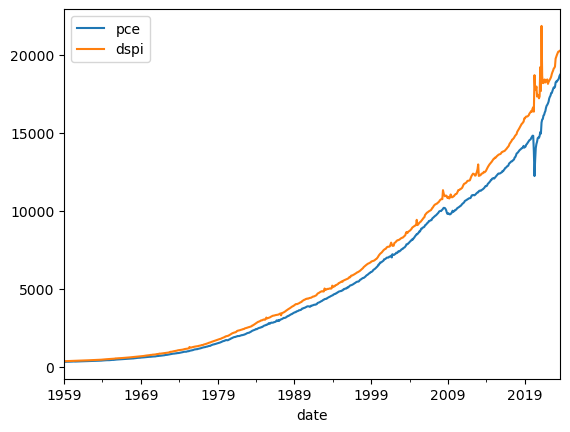

In [15]:
df.plot()

# Cointegration
- Joanson test vs Engle-Granger vs Augmented Engle-Granger
- What are these results telling us?

In [17]:
import statsmodels.tsa.stattools as sm

In [21]:
coint_t, pvalue, crit_value = sm.coint(df["pce"], df["dspi"])
coint_t, pvalue, crit_value

(-5.436758026018645,
 2.3979441424101145e-05,
 array([-3.9106273 , -3.34402536, -3.04992704]))

In [29]:
# log instead of percent_change

In [23]:
differenced_df = df.pct_change()
differenced_df

,pce,dspi
date,,
1959-01-01,NaN,NaN
1959-02-01,0.011434,0.003983
1959-03-01,0.010013,0.006517
1959-04-01,-0.001599,0.008446
1959-05-01,0.012492,0.005863
...,...,...
2023-04-01,0.004441,0.005456
2023-05-01,0.002396,0.004586
2023-06-01,0.004216,0.001287


In [32]:
# memory-less but the point of coinintegration is to preserve memory, so don't use pct_change

<AxesSubplot: xlabel='date'>

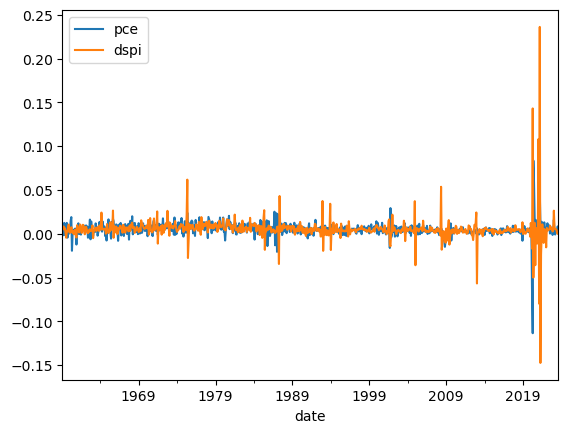

In [30]:
differenced_df.plot()

<AxesSubplot: xlabel='date'>

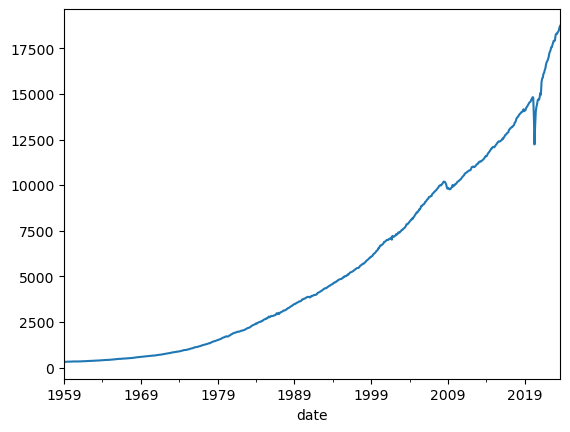

In [31]:
df["pce"].plot()

In [27]:
differenced_df = differenced_df.dropna()
differenced_df

,pce,dspi
date,,
1959-02-01,0.011434,0.003983
1959-03-01,0.010013,0.006517
1959-04-01,-0.001599,0.008446
1959-05-01,0.012492,0.005863
1959-06-01,0.006643,0.006384
...,...,...
2023-04-01,0.004441,0.005456
2023-05-01,0.002396,0.004586
2023-06-01,0.004216,0.001287


In [28]:
differenced_coint_t, differenced_pvalue, differenced_crit_value = sm.coint(differenced_df["pce"], differenced_df["dspi"])
differenced_coint_t, differenced_pvalue, differenced_crit_value

(-6.028861021289375,
 1.4062766964130664e-06,
 array([-3.91064571, -3.34403558, -3.04993413]))